In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import glob
import os
import numpy as np
from PIL import Image
import torchvision.models as models
import copy
from torchvision.utils import save_image
import PIL
from torch.autograd import Variable
from models import Generator, Discriminator, VAE
import training_helper as th
import skimage.io
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE

In [6]:
#preperations
device = th.getCudaDevice(cudaNum = 0, torchSeed = 123)

G = Generator().to(device)
D = Discriminator().to(device)
G.eval()
optimizerG = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
th.loadModel('p2_latest_G.pth',G,optimizerG)

Device used: cuda:0
model loaded from p2_latest_G.pth


In [5]:
# question 1
print(G,D)

Generator(
  (decoder): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )

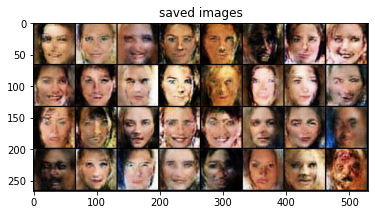

In [20]:
# question 2
G.eval()
fixedNoise = Variable(torch.randn(32, 100, 1, 1))
#torch.save(fixedNoise, "p2_fixed_noise.pt")
fixedNoise = torch.load("p2_fixed_noise.pt").to(device)

generatedImages = G(fixedNoise)
torchvision.utils.save_image(generatedImages.cpu().data, 'hw3_data/p2_report/question2.jpg', nrow=8)

#show saved image
savedImg = skimage.io.imread('hw3_data/p2_report/question2.jpg')
fig, ax = plt.subplots()
ax.imshow(savedImg)
ax.set_title('saved images')
plt.show()